<a href="https://colab.research.google.com/github/akshaymore08/machine-learning/blob/main/Outlier%20detection%20and%20removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [10]:
df=pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/2_outliers_z_score/heights.csv')
df

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


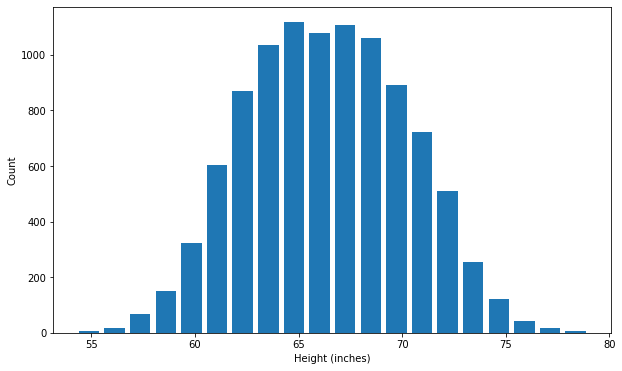

In [11]:
plt.hist(df.height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

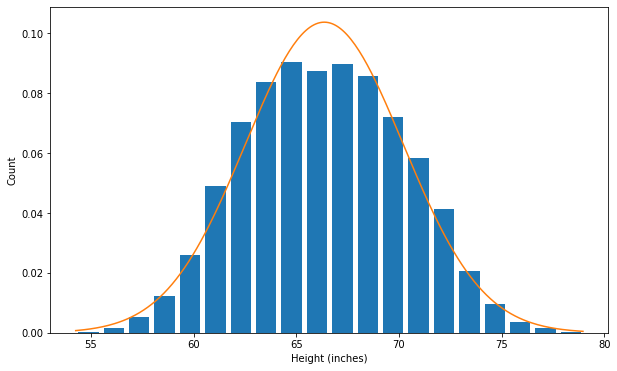

In [12]:
from scipy.stats import norm
import numpy as np
plt.hist(df.height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.height.mean(),df.height.std()))

In [13]:
df.height.mean()

66.3675597548656

In [14]:
df.height.std()

3.847528120795573

In [15]:
upper_limit = df.height.mean() + 3*df.height.std()
upper_limit

77.91014411725232

In [16]:
lower_limit = df.height.mean() -3*df.height.std()
lower_limit

54.824975392478876

In [17]:
df[(df.height>upper_limit) | (df.height<lower_limit)]


,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [18]:
df_no_outlier_std_dev = df[(df.height<upper_limit) & (df.height>lower_limit)]
df_no_outlier_std_dev.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [19]:
df_no_outlier_std_dev.shape

(9993, 2)

In [20]:
df.shape


(10000, 2)

In [21]:
df['zscore'] = ( df.height - df.height.mean() ) / df.height.std()
df.head(5)

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [22]:
df[df['zscore']>3]


,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [23]:
df[df['zscore']<-3]


,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [24]:
df[(df.zscore<-3) | (df.zscore>3)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [25]:
df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [26]:
df_no_outliers.shape


(9993, 3)

In [27]:
df.shape


(10000, 3)